In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from math import factorial
np.set_printoptions(precision=3, linewidth=200)

In [21]:
def get_points(a, b, n, deg, mode):
    deg = deg + 1
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.sort(np.random.rand(n) * (b - a) + a)
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    new_points = []
    
    for el in points:
        for _ in range(deg):
            new_points.append(el)
    return np.array(new_points)

In [22]:
get_points(0, 3, 4, 1, 'uniform')

array([0., 0., 1., 1., 2., 2., 3., 3.])

In [23]:
def plot(f1, f2, a, b, deg, name):
    #a = a - 1
    #b = b + 1
    plot_points = get_points(a, b, int(100 * (b - a)), 0, 'uniform')
    plt.plot(plot_points, f1(plot_points), label='interpolation')
    plt.plot(plot_points, f2(plot_points, 0), label='function')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.show()

In [24]:
def sin(x, deg=0):
    if deg % 4 == 0:
        return np.sin(x)
    elif deg % 4 == 1:
        return np.cos(x)
    elif deg % 4 == 2:
        return -np.sin(x)
    elif deg % 4 == 3:
        return -np.cos(x)

In [25]:
# a * e ^ (bx) + c
def get_exp(a, b, c):
    def exp(x, deg=0):
        scalar = False
        if isinstance(x, (int, float, complex)):
            scalar = True
        if scalar:
            if deg == 0:
                return (a * np.exp(b * x) + c)
            else:
                return (a * np.power(b, deg) * np.exp(b * x))
        else:
            if deg == 0:
                return (a * np.exp(b * x) + c)[:len(x)]
            else:
                return (a * np.power(b, deg) * np.exp(b * x))[:len(x)]
    return exp

In [26]:
def abs(x, deg=0):
    if deg == 0:
        return np.abs(x)
    if deg == 1:
        return np.sign(x)
    if deg > 1:
        return np.zeros(x.shape)

In [27]:
e = get_exp(2, 2, 1)
e([-1, 0, 1])

array([1.736, 3.   , 6.437])

In [28]:
print(abs(np.array([-1, 0, 2]), 0))
print(abs(np.array([-1, 0, 2]), 1))
print(abs(np.array([-1, 0, 2]), 2))

[1 0 2]
[-1  0  1]
[0. 0. 0.]


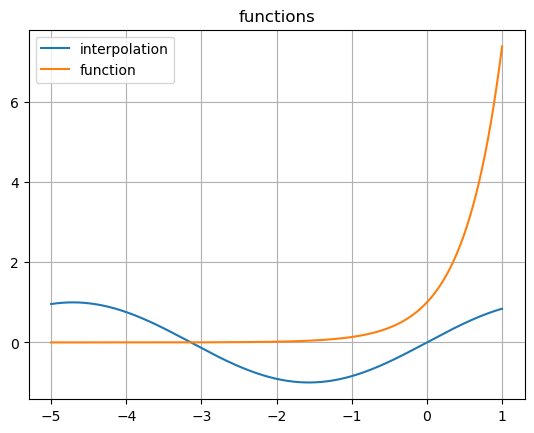

In [29]:
plot(sin, get_exp(1, 2, 0), -5, 1, 0, 'functions')

In [30]:
def divided_differences(n, p, f, deg):
    deg = deg + 1
    matrix = np.zeros((n * deg, n * deg))
    #matrix = [['' for i in range(n * deg)] for j in range(n * deg)]
    for i in range(n):
        for j in range(deg):
            for k in range(0, j + 1):
                matrix[i * deg + j][k] = f(p[i * deg + j], k) / factorial(k)
            for k in range(j + 1, j + 1 + i * deg):
                matrix[i * deg + j][k] = (matrix[i * deg + j][k - 1] - matrix[i * deg + j - 1][k - 1]) / (p[i * deg + j] - p[i * deg + j - k])
    return matrix

In [31]:
print(p := get_points(-3, 3, 5, 1, 'chebyshev'))
divided_differences(5, p, sin, 1)

[-2.853 -2.853 -1.763 -1.763  0.     0.     1.763  1.763  2.853  2.853]


array([[-2.844e-01,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-2.844e-01, -9.587e-01,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-9.815e-01, -6.396e-01,  2.928e-01,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-9.815e-01, -1.914e-01,  4.113e-01,  1.088e-01,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  5.566e-01,  4.242e-01,  4.511e-03, -3.654e-02,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  1.000e+00,  2.514e-01, -9.796e-02, -3.592e-02,  2.201e-04,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 9.815e-01,  5.566e-01, -2.514e-01, -1.426e-01, -1.265e-02,  5.039e-03,  1.044e-03,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 9.815e-01, -1.914e-01, -4.242e-01, -9.796e-02,  1.265e-02,  7.176e-03,  4.631e-04, -1.25

In [32]:
def hermit_interpol(n, a, b, f, deg, mode, verbose=False):
    n = n + 1
    points = np.array(get_points(a, b, n, deg, mode))
    diff = divided_differences(n, points, f, deg)
    poly = Polynomial([diff[0][0]])
    for i in range(1, n * (deg + 1)):
        poly += diff[i][i] * Polynomial.fromroots(points[:i])
    if verbose:
        print(poly)
    plot(poly, f, a, b, deg, 'Hermit ' + mode + f' {deg=}')

0.0 - (6.106e-16)·x + 6.456·x² + (8.882e-15)·x³ - 41.281·x⁴ - (4.974e-14)·x⁵ + 128.4·x⁶ + (9.948e-14)·x⁷ - 167.927·x⁸ - (5.684e-14)·x⁹ + 75.352·x¹⁰


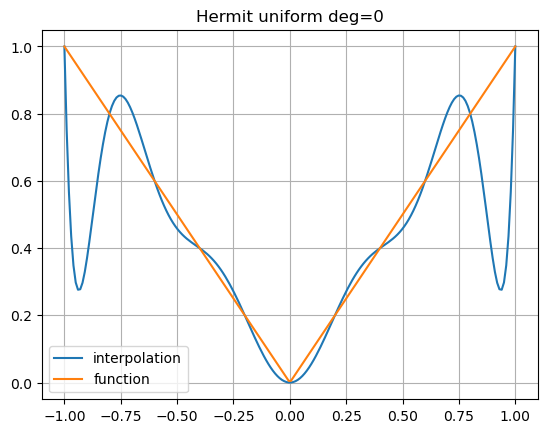

0.0 - (2.22e-16)·x + 4.807·x² + (4.441e-15)·x³ - 18.739·x⁴ - (8.882e-15)·x⁵ + 39.507·x⁶ + (1.421e-14)·x⁷ - 38.229·x⁸ - (5.329e-15)·x⁹ + 13.667·x¹⁰


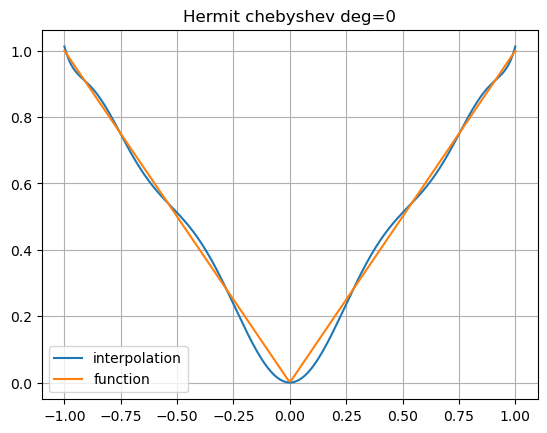

In [33]:
hermit_interpol(10, -1, 1, abs, 0, 'uniform', True)
hermit_interpol(10, -1, 1, abs, 0, 'chebyshev', True)

2.776e-16 + 0.941·x + 0.0·x² - (9.93e-02)·x³


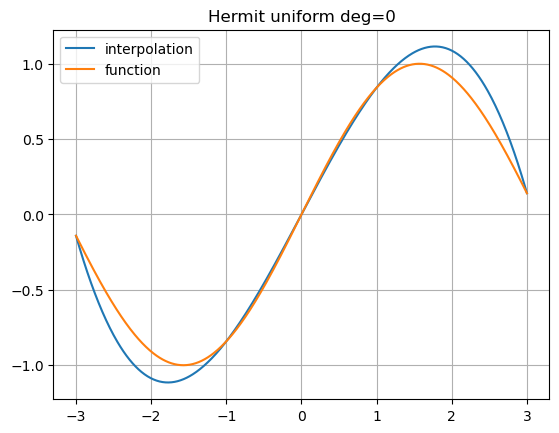

3.886e-16 + 0.932·x + 0.0·x² - 0.104·x³


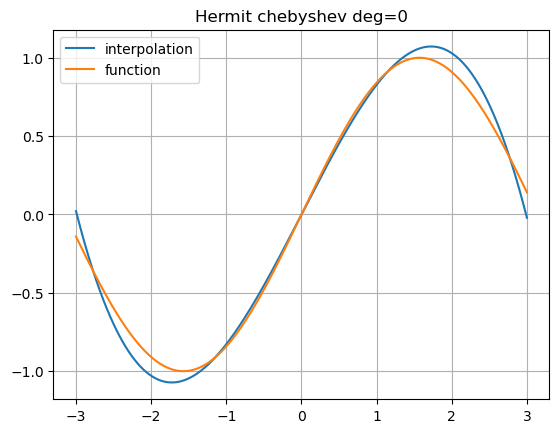

In [42]:
hermit_interpol(3, -3, 3, sin, 0, 'uniform', True)
hermit_interpol(3, -3, 3, sin, 0, 'chebyshev', True)

0.0 + 0.566·x + 0.0·x² - (5.761e-02)·x³


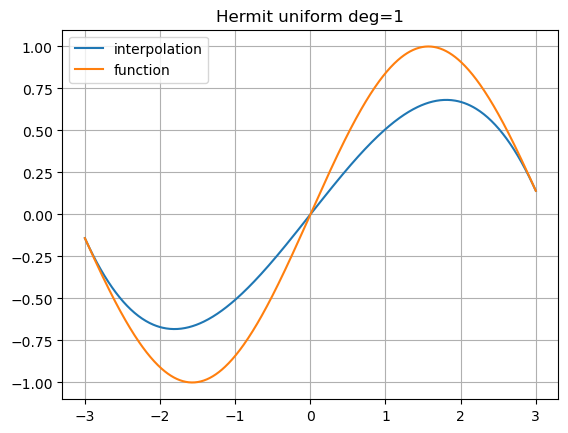

4.441e-16 + 0.864·x - (2.776e-17)·x² - 0.103·x³


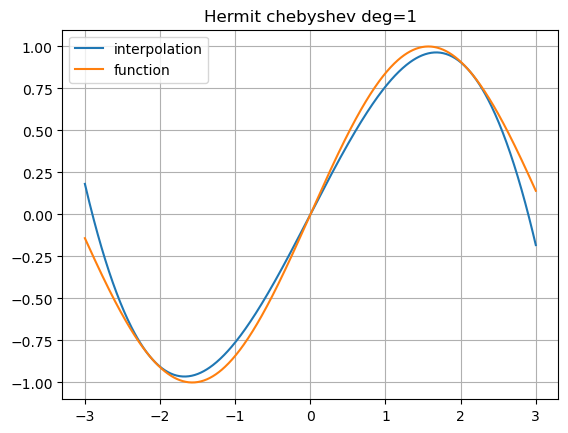

In [46]:
hermit_interpol(1, -3, 3, sin, 1, 'uniform', True)
hermit_interpol(1, -3, 3, sin, 1, 'chebyshev', True)

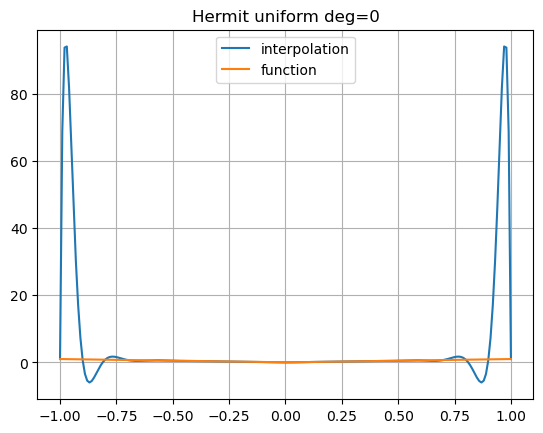

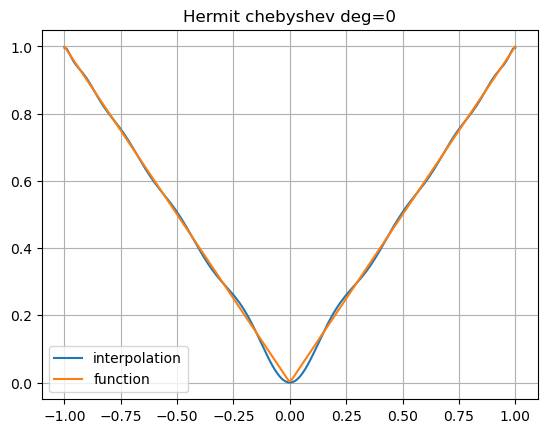

In [35]:
hermit_interpol(20, -1, 1, abs, 0, 'uniform', False)
hermit_interpol(20, -1, 1, abs, 0, 'chebyshev', False)

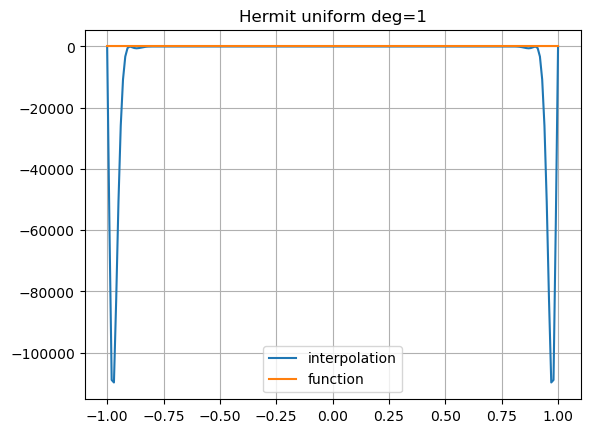

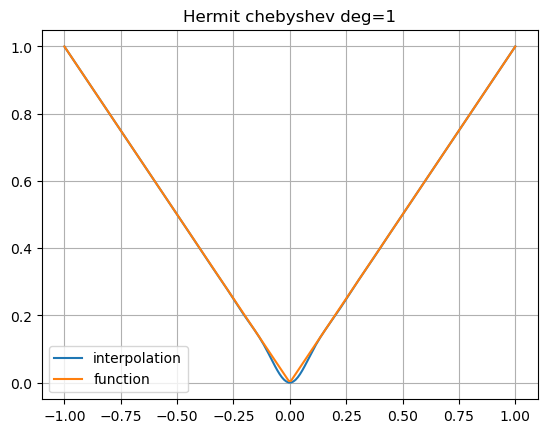

In [36]:
hermit_interpol(20, -1, 1, abs, 1, 'uniform', False)
hermit_interpol(20, -1, 1, abs, 1, 'chebyshev', False)

0.872 + 1.623·x + 0.64·x² - 0.163·x³ + (3.91e-02)·x⁴ + (3.819e-02)·x⁵


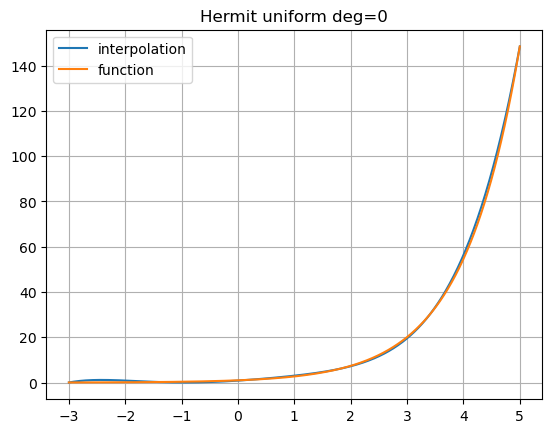

1.036 + 2.012·x + 0.543·x² - 0.216·x³ + (4.213e-02)·x⁴ + (3.936e-02)·x⁵


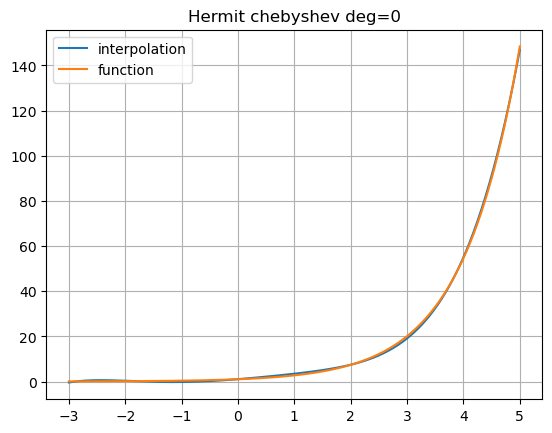

In [45]:
hermit_interpol(5, -3, 5, get_exp(1, 1, 0), 0, 'uniform', True)
hermit_interpol(5, -3, 5, get_exp(1, 1, 0), 0, 'chebyshev', True)

-0.319 + 3.134·x + 0.284·x² - 0.493·x³ + (6.551e-02)·x⁴ + (4.694e-02)·x⁵


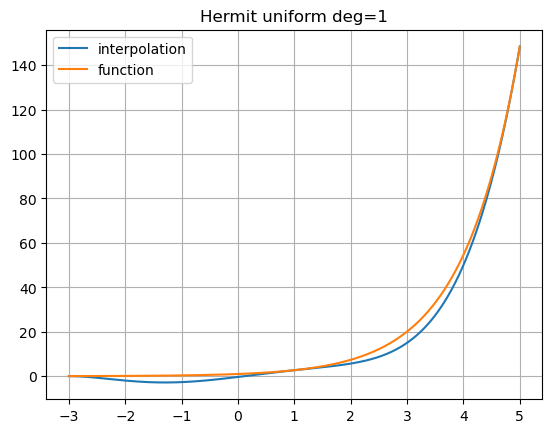

0.384 + 1.935·x + 0.535·x² - 0.217·x³ + (4.205e-02)·x⁴ + (3.935e-02)·x⁵


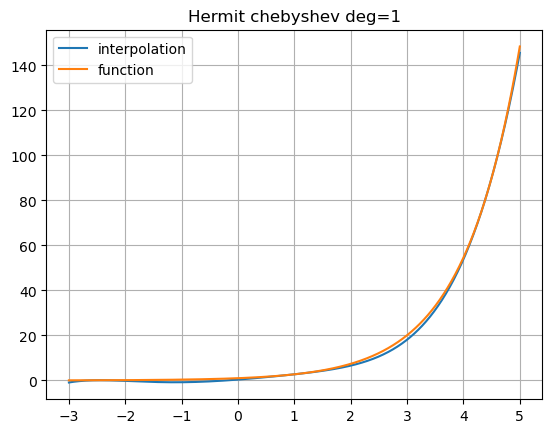

In [37]:
hermit_interpol(2, -3, 5, get_exp(1, 1, 0), 1, 'uniform', True)
hermit_interpol(2, -3, 5, get_exp(1, 1, 0), 1, 'chebyshev', True)